
📝 Automobile Imports Price Prediction – Project Report
📌 Objective:

To analyze and predict automobile prices based on various features like engine size, fuel type, horsepower, dimensions, and brand using machine learning models.
📁 Dataset Summary

    Source: UCI Machine Learning Repository

    File: imports-85.data (converted to CSV as auto_imports.csv)

    Instances: 205

    Features: 26 (including price as the target)



    | Feature Name     | Description            |
| ---------------- | ---------------------- |
| make             | Manufacturer brand     |
| fuel\_type       | Gas or diesel          |
| aspiration       | Standard or turbo      |
| num\_doors       | Two or four doors      |
| body\_style      | Sedan, hatchback, etc. |
| drive\_wheels    | FWD, RWD, 4WD          |
| engine\_location | Front or rear          |
| engine\_size     | Size of engine in cc   |
| horsepower       | Engine power           |
| city\_mpg        | Mileage in city        |
| highway\_mpg     | Mileage on highway     |
| price            | **Target Variable**    |


In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor


 ## Read in the data

In [122]:
df = pd.read_csv("auto_imports.csv", header=0)


In [123]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 
        'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
        'engine-location', 'wheel-base', 'length', 'width', 'height',
        'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 
        'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
auto_df = pd.read_csv('auto_imports.csv', names=cols)
print(auto_df.shape)

(201, 26)


## Basic Checks

In [124]:
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [125]:
# Replace '?' with np.nan
auto_df.replace('?', np.nan, inplace=True)


In [126]:
auto_df.info()  # Check types after replacing '?'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [127]:
auto_df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [128]:
auto_df.shape

(201, 26)

In [129]:
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [130]:
auto_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


## Cleaning ##

### Numeric vs. non-numeric columns

In [165]:
continuous_numeric = ['normalized-losses', 'wheel-base', 'length', 'width', 
'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'engine-size',
'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_auto = auto_df[continuous_numeric].copy()
numeric_auto.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.4,10.0,109,102.0,5500.0,24,30,13950
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.4,8.0,136,115.0,5500.0,18,22,17450
6,158.0,105.8,192.7,71.4,55.7,2844,3.19,3.4,8.5,136,110.0,5500.0,19,25,17710
8,158.0,105.8,192.7,71.4,55.9,3086,3.13,3.4,8.3,131,140.0,5500.0,17,20,23875
9,192.0,101.2,176.8,64.8,54.3,2395,3.50,2.8,8.8,108,101.0,5800.0,23,29,16430


## Missing values ##

In [166]:
numeric_auto.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
engine-size          0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [167]:
# While there's not any NULL values in the cars dataframe, the 'normalized-losses' column contains 41 missing values, symbolized by a question mark '?', as seen below.

In [168]:
numeric_auto['normalized-losses'].value_counts()

normalized-losses
161.0    11
91.0      8
128.0     6
104.0     6
134.0     6
168.0     5
85.0      5
103.0     5
95.0      5
102.0     5
65.0      5
94.0      5
74.0      5
93.0      4
118.0     4
106.0     4
122.0     4
150.0     3
154.0     3
83.0      3
125.0     3
115.0     3
137.0     3
101.0     3
148.0     3
192.0     2
197.0     2
188.0     2
87.0      2
89.0      2
81.0      2
110.0     2
145.0     2
164.0     2
119.0     2
194.0     2
108.0     2
129.0     2
113.0     2
153.0     2
158.0     2
121.0     1
256.0     1
90.0      1
77.0      1
98.0      1
231.0     1
107.0     1
78.0      1
142.0     1
186.0     1
Name: count, dtype: int64

In [169]:
#Let's replace any question mark in the data with the numpy.nan missing value.

In [170]:
import numpy as np

# Replace '?' with NaN
auto_df.replace('?', np.nan, inplace=True)

# Convert specific columns to numeric
cols_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in cols_to_convert:
    auto_df[col] = pd.to_numeric(auto_df[col], errors='coerce')

# Check missing values
print(auto_df.isnull().sum())

# Drop or impute (as per your strategy)
auto_df.dropna(inplace=True)  # OR use auto_df.fillna(...)


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [171]:
numeric_auto.replace('?', np.nan, inplace=True)
print("\nMissing values before: \n\n", numeric_auto.isnull().sum(), "\n\n")


Missing values before: 

 normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
engine-size          0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64 




In [172]:
# Any column that now has NaN values on it, before containg question marks, which made pandas cast it to the object data types, as seen below.

In [173]:
numeric_auto.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
engine-size            int64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [174]:
# Let's convert those to numeric types, since they all contain numeric data values.

In [175]:
to_numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
numeric_auto[to_numeric_cols] = numeric_auto[to_numeric_cols].astype(float)
numeric_auto.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
bore                 float64
stroke               float64
compression-ratio    float64
engine-size            int64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [176]:
#The dataset has 205 rows, and we've seen how there're up to 41 NaN values. This means handling those by removing any row where there's a NaN value would result in losing close to 25% of the data, which is not a good solution.

#Let's only apply that to any row that has more than one missing value, and handle the rest by replacing any NaN value with the average of that column.

In [177]:
numeric_auto.dropna(axis=0, thresh=2, inplace=True)
numeric_auto = numeric_auto.fillna(numeric_auto.mean())
print("\nMissing values after: \n\n", numeric_auto.isnull().sum(), "\n")


Missing values after: 

 normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
engine-size          0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64 



In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define model
rf = RandomForestRegressor(random_state=1)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Handling Outliers

Removed 5 outliers from 'price'
Removed 1 outliers from 'horsepower'
Removed 12 outliers from 'engine-size'

Final shape after outlier removal: (141, 15)


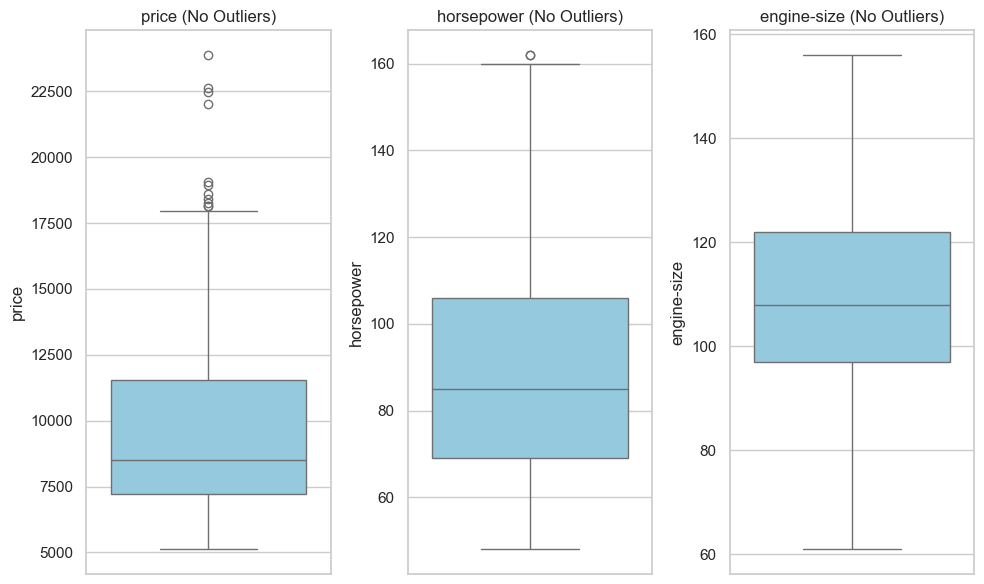

In [179]:
# Step 2: Outlier Handling using IQR method

import pandas as pd

# Make a copy of the original dataset
df_outlier = numeric_auto.copy()

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered_df

# List of important numeric columns to check for outliers
important_cols = ['price', 'horsepower', 'engine-size']

# Remove outliers in those columns one by one
for col in important_cols:
    before = df_outlier.shape[0]
    df_outlier = remove_outliers_iqr(df_outlier, col)
    after = df_outlier.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")

# Resulting clean dataset
print("\nFinal shape after outlier removal:", df_outlier.shape)

# Optional: visualize boxplots again to confirm outliers are handled
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i, col in enumerate(important_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_outlier[col], color='skyblue')
    plt.title(f"{col} (No Outliers)")
plt.tight_layout()
plt.show()


In [200]:
for col in important_cols:
    before = df_outlier.shape[0]
    df_outlier = remove_outliers_iqr(df_outlier, col)
    after = df_outlier.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")


Removed 11 outliers from 'price'
Removed 0 outliers from 'horsepower'
Removed 0 outliers from 'engine-size'


In [180]:
print(df_outlier.columns.tolist())


['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


## IQR-Based Outlier Removal

In [201]:
# Make a copy to keep original data safe
df_iqr = numeric_auto.copy()

# Loop through all numerical columns
for col in df_iqr.columns:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter rows within bounds
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

# Final shape and confirmation
print(f"✅ Shape after outlier removal: {df_iqr.shape}")


✅ Shape after outlier removal: (92, 15)


In [202]:
print(f"Original rows: {numeric_auto.shape[0]}")
print(f"After outlier removal: {df_iqr.shape[0]}")
print(f"🔴 Total outliers removed: {numeric_auto.shape[0] - df_iqr.shape[0]}")


Original rows: 159
After outlier removal: 92
🔴 Total outliers removed: 67


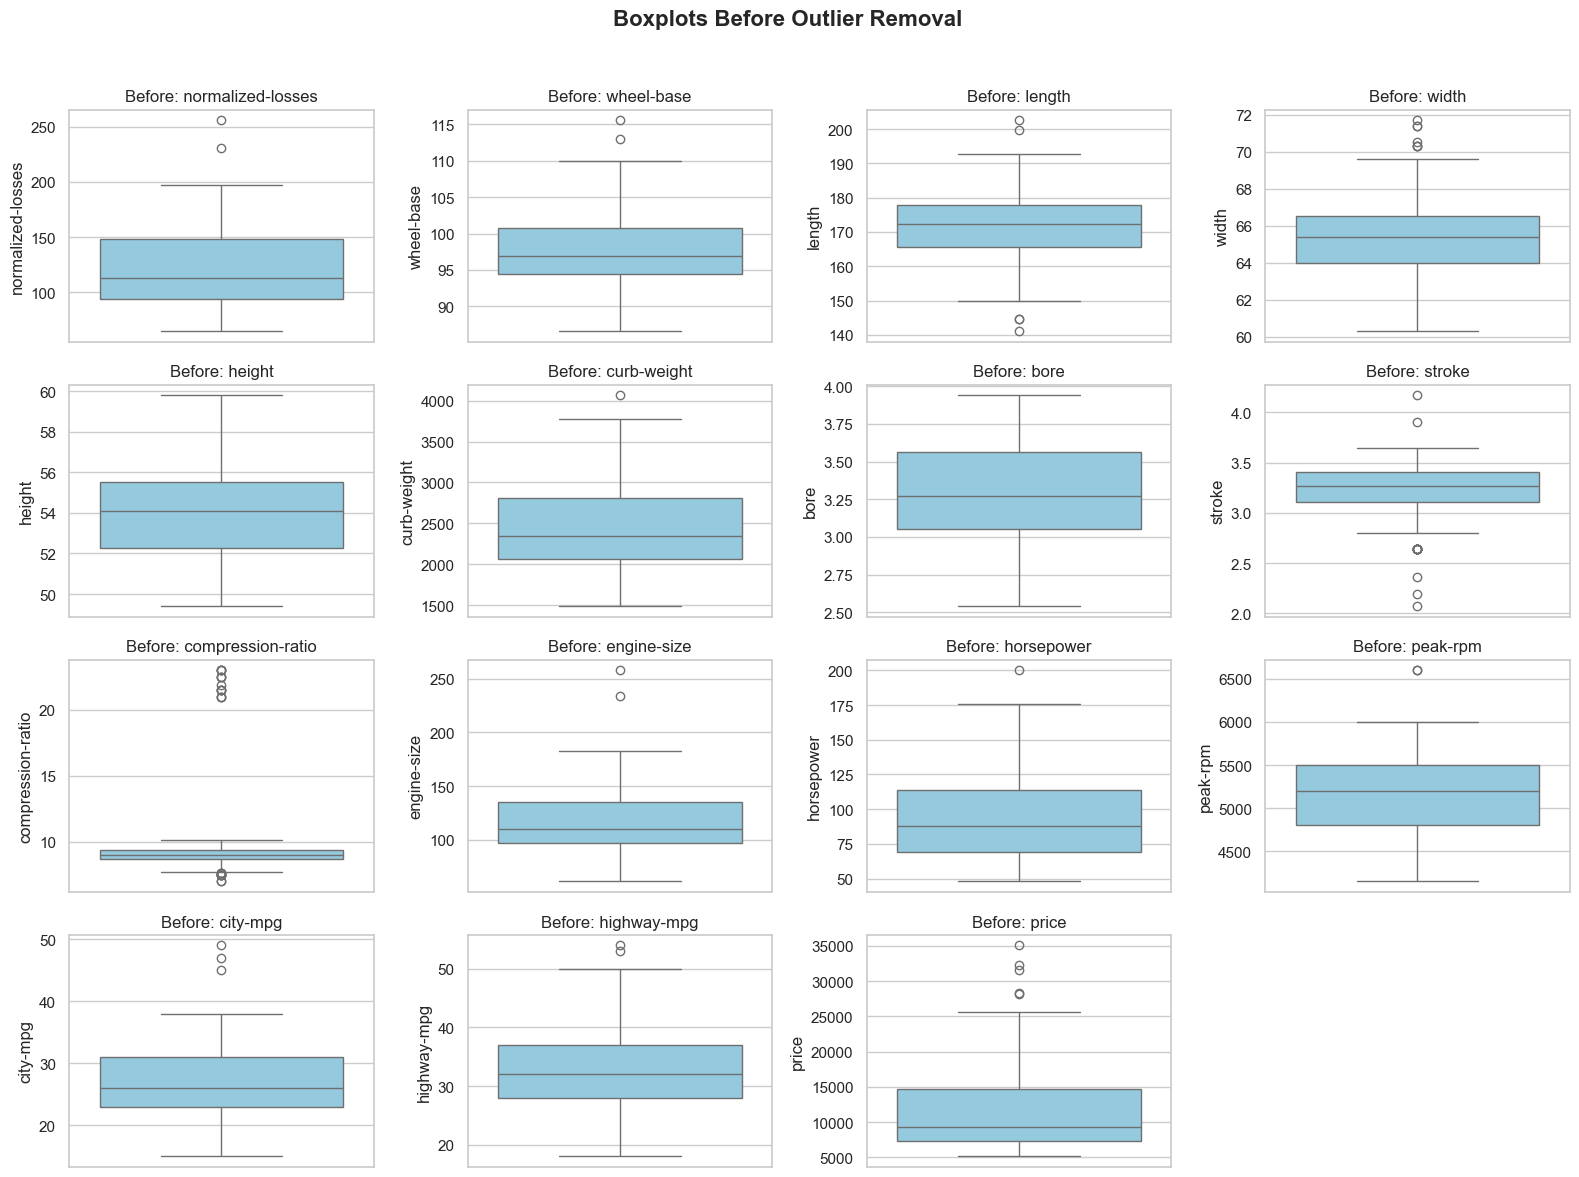

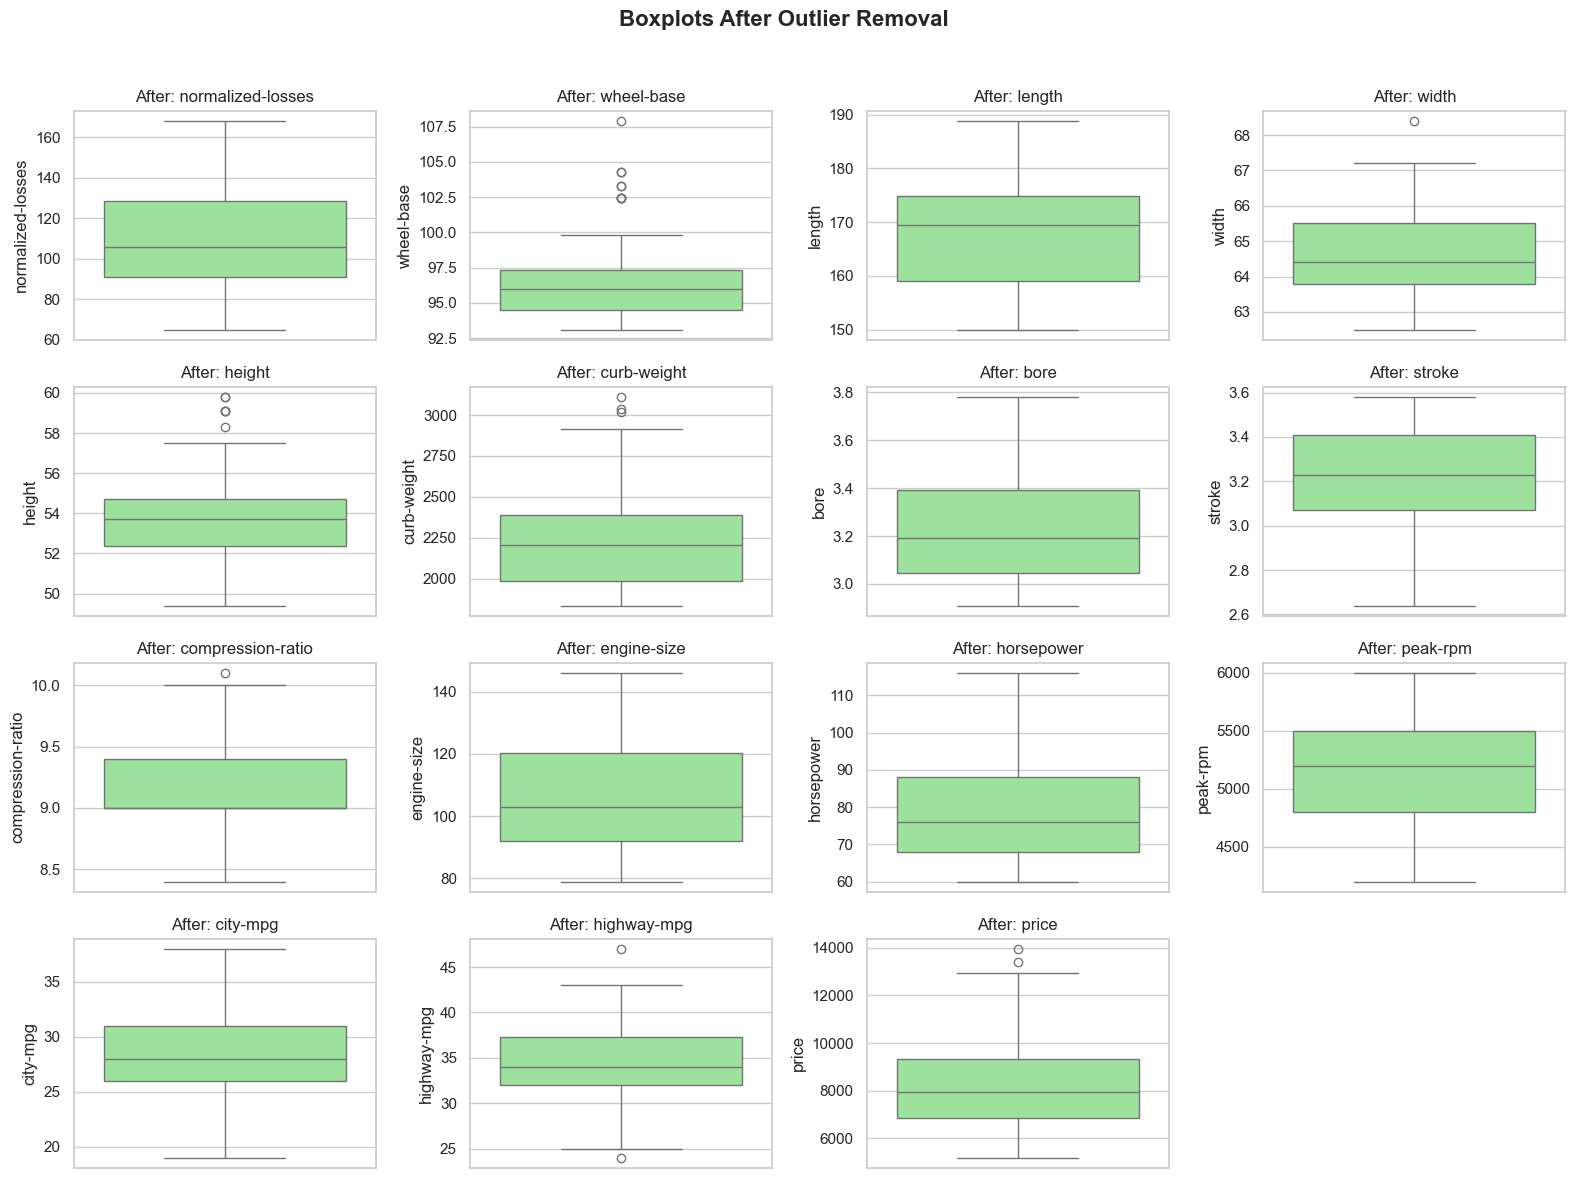

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. BEFORE Outlier Removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_auto.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=numeric_auto[col], color='skyblue')
    plt.title(f"Before: {col}")
    plt.tight_layout()

plt.suptitle("Boxplots Before Outlier Removal", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. AFTER Outlier Removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_iqr.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_iqr[col], color='lightgreen')
    plt.title(f"After: {col}")
    plt.tight_layout()

plt.suptitle("Boxplots After Outlier Removal", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [204]:
for col in important_cols:
    before = df_outlier.shape[0]
    df_outlier = remove_outliers_iqr(df_outlier, col)
    after = df_outlier.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")


Removed 13 outliers from 'price'
Removed 1 outliers from 'horsepower'
Removed 9 outliers from 'engine-size'


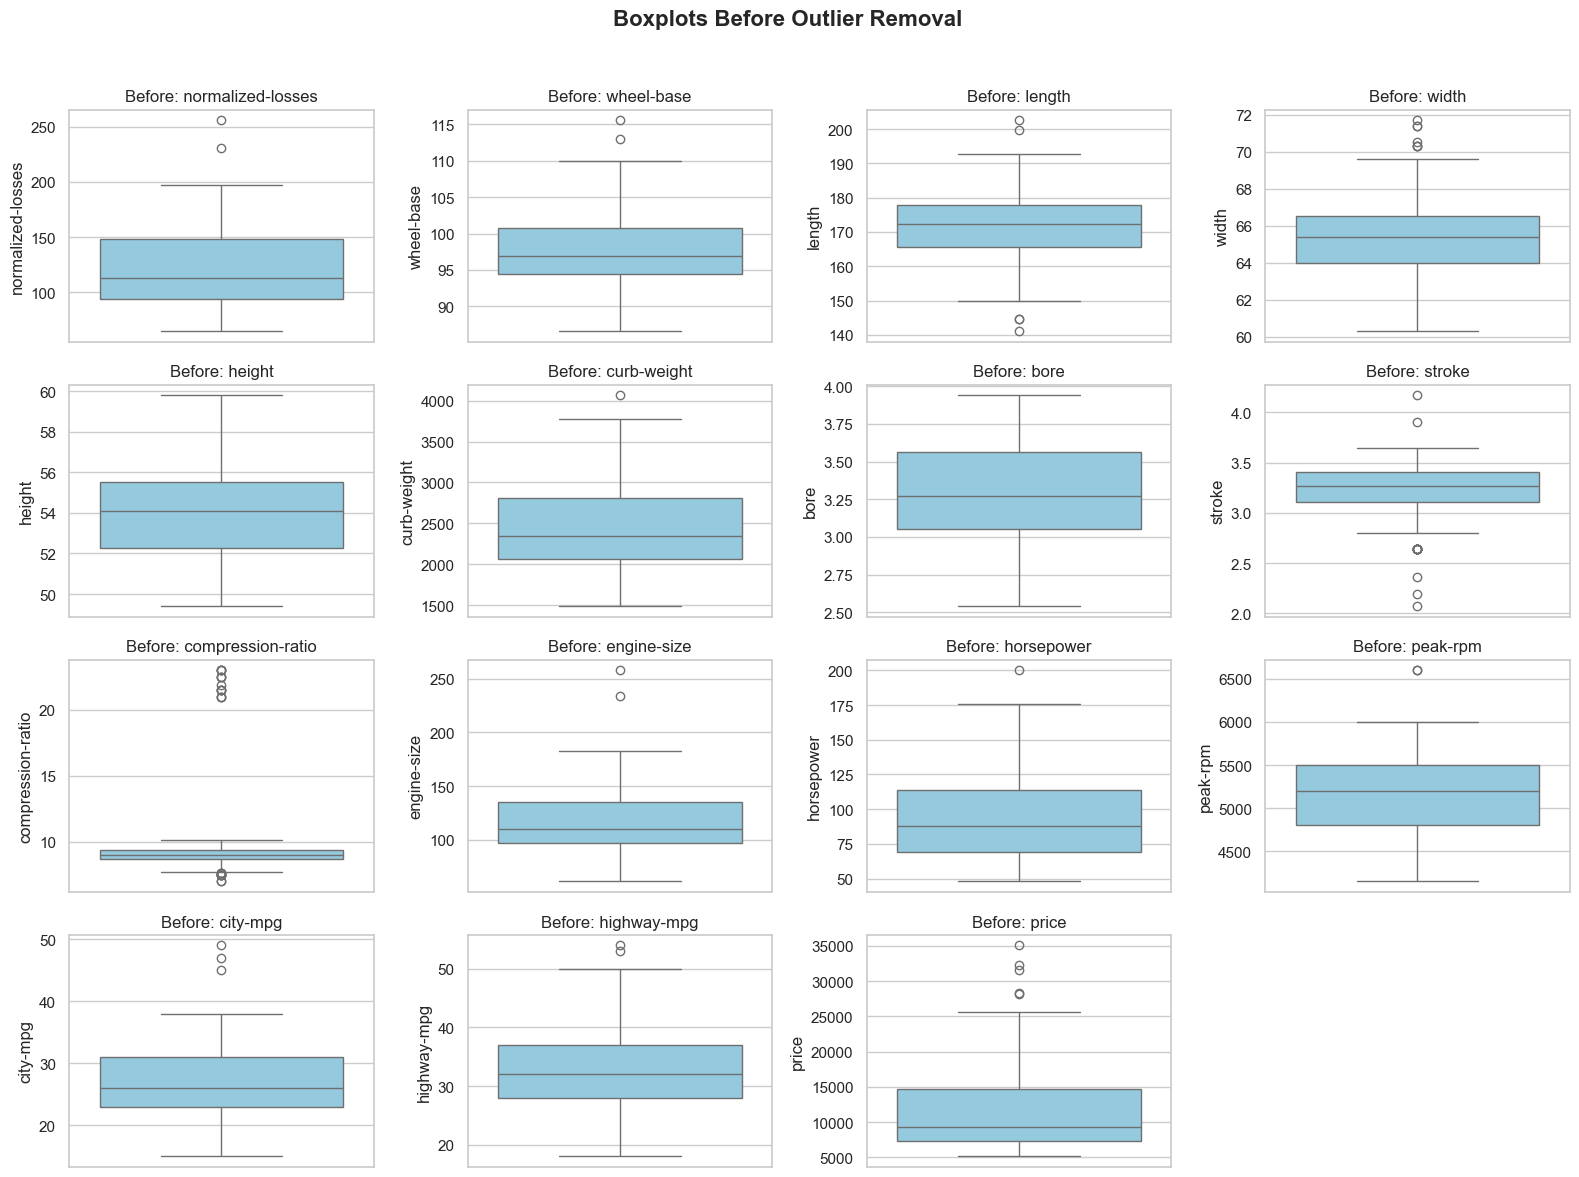


🧹 Outlier Removal Summary:
Removed 5 outliers from 'price'
Removed 1 outliers from 'horsepower'


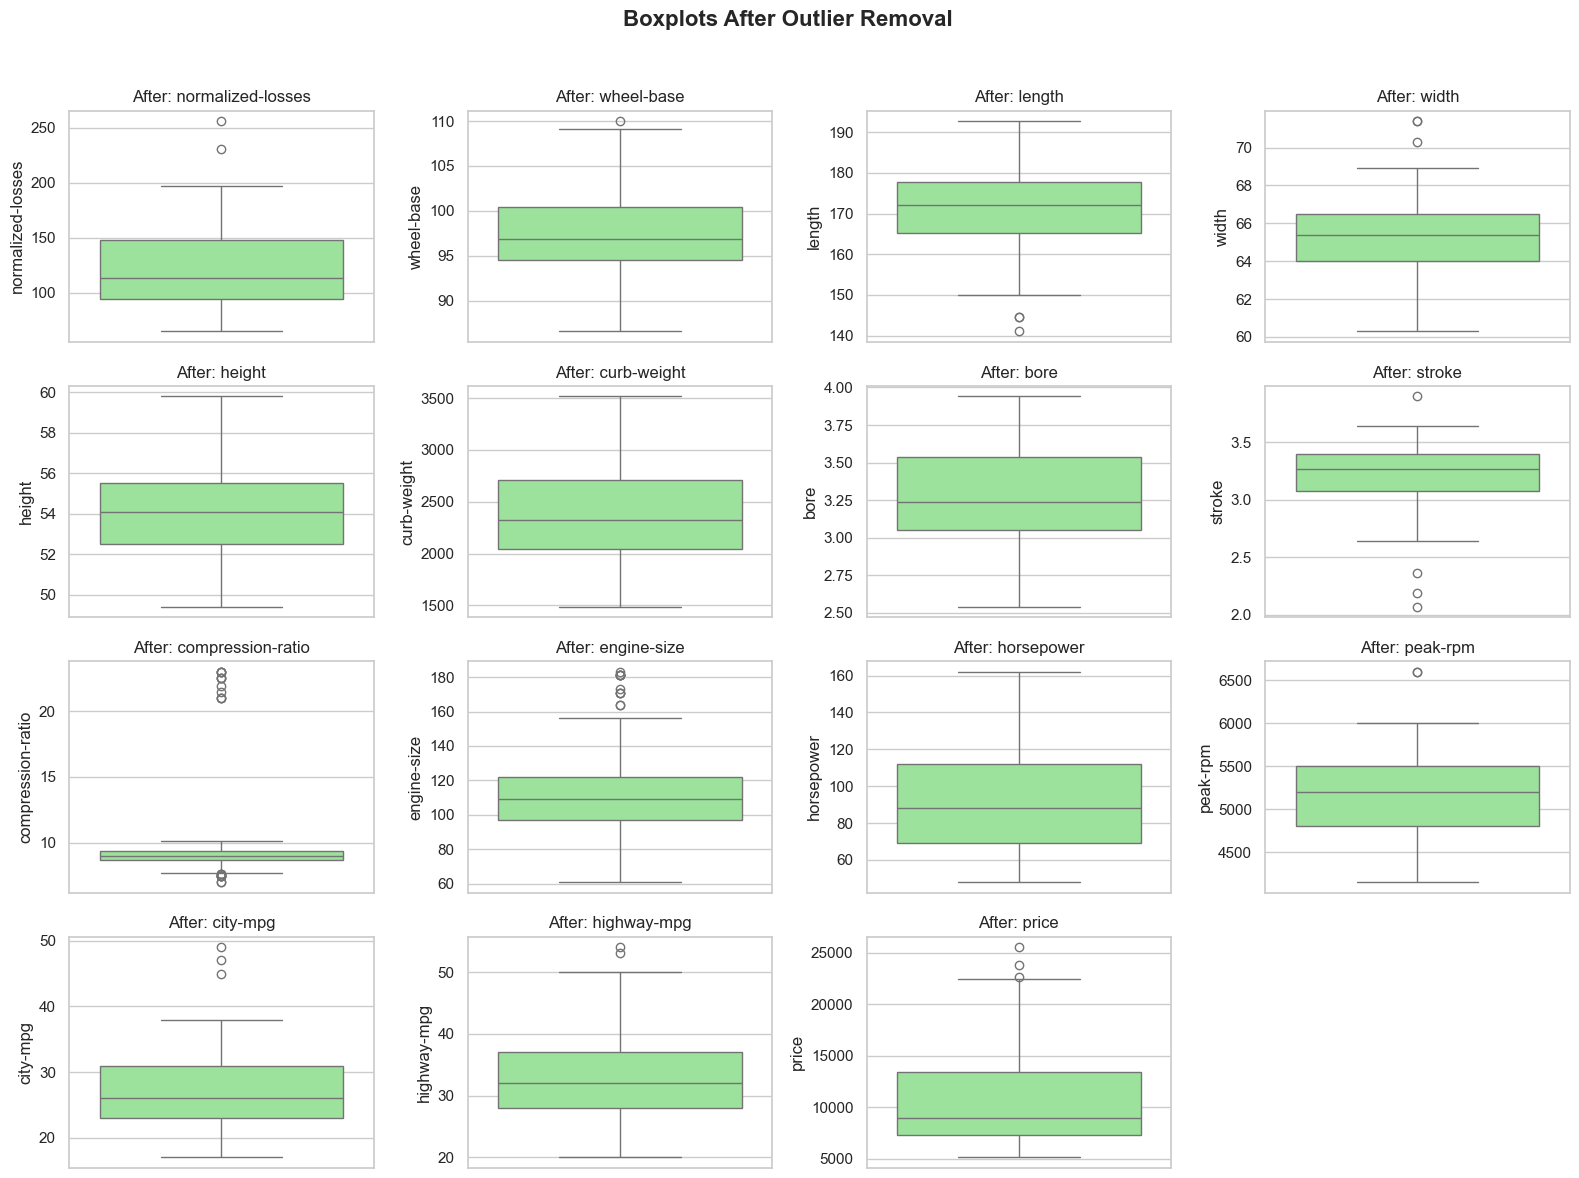

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Show Boxplots BEFORE outlier removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_auto.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=numeric_auto[col], color='skyblue')
    plt.title(f"Before: {col}")
    plt.tight_layout()

plt.suptitle("Boxplots Before Outlier Removal", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Only use columns that exist
important_cols = ['price', 'horsepower']

df_iqr = numeric_auto.copy()

print("\n🧹 Outlier Removal Summary:")
for col in important_cols:
    before = df_iqr.shape[0]
    df_iqr = remove_outliers_iqr(df_iqr, col)
    after = df_iqr.shape[0]
    print(f"Removed {before - after} outliers from '{col}'")

# 3. Show Boxplots AFTER outlier removal
plt.figure(figsize=(16, 12))
for i, col in enumerate(df_iqr.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df_iqr[col], color='lightgreen')
    plt.title(f"After: {col}")
    plt.tight_layout()

plt.suptitle("Boxplots After Outlier Removal", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Normalization ##

In [206]:
# Normalizing the numeric values using min-max normalization will make all values range from 0 to 1. This will prevent outliers when measuring squared erros.

# Let's apply that to all columns except for the target column, 'price'.

In [207]:
# Min-Max Normalization for all columns except 'price'
normalized_auto = numeric_auto.copy()
features = normalized_auto.columns.drop('price')

# Apply min-max normalization
normalized_auto[features] = (normalized_auto[features] - normalized_auto[features].min()) / (normalized_auto[features].max() - normalized_auto[features].min())

# Keep 'price' unchanged (target variable)
print("✅ Normalized shape:", normalized_auto.shape)
normalized_auto.head()


✅ Normalized shape: (159, 15)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.464286,0.633333,0.18750,0.243655,0.355263,0.551020,0.264706,0.333333,13950.0
4,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.464286,0.633333,0.06250,0.380711,0.440789,0.551020,0.088235,0.111111,17450.0
6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.464286,0.633333,0.09375,0.380711,0.407895,0.551020,0.117647,0.194444,17710.0
8,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.421429,0.633333,0.08125,0.355330,0.605263,0.551020,0.058824,0.055556,23875.0
9,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.685714,0.347619,0.11250,0.238579,0.348684,0.673469,0.235294,0.305556,16430.0


In [208]:
normalized_auto = (numeric_auto - numeric_auto.min())/(numeric_auto.max() - numeric_auto.min())
#normalized_auto = np.abs((numeric_auto - numeric_auto.mean())/numeric_auto.std())
normalized_auto['price'] = numeric_auto['price']
print(normalized_auto.shape)
normalized_auto.head()

(159, 15)


,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.464286,0.633333,0.18750,0.243655,0.355263,0.551020,0.264706,0.333333,13950.0
4,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.464286,0.633333,0.06250,0.380711,0.440789,0.551020,0.088235,0.111111,17450.0
6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.464286,0.633333,0.09375,0.380711,0.407895,0.551020,0.117647,0.194444,17710.0
8,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.421429,0.633333,0.08125,0.355330,0.605263,0.551020,0.058824,0.055556,23875.0
9,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.685714,0.347619,0.11250,0.238579,0.348684,0.673469,0.235294,0.305556,16430.0


## Distribution of Car Prices

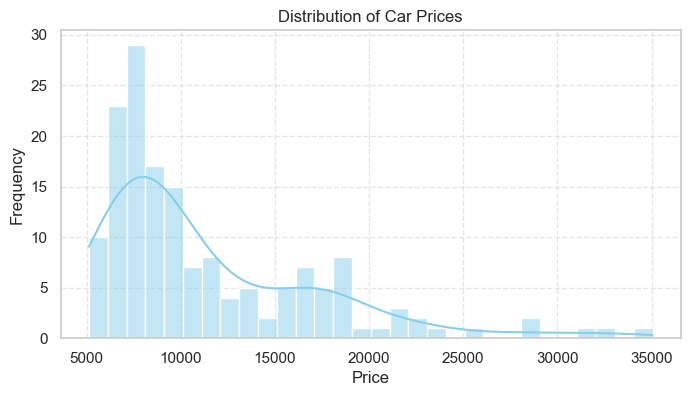

In [209]:
plt.figure(figsize=(8, 4))
sns.histplot(auto_df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [210]:
auto_df['body-style'].value_counts(dropna=False)


body-style
sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
Name: count, dtype: int64

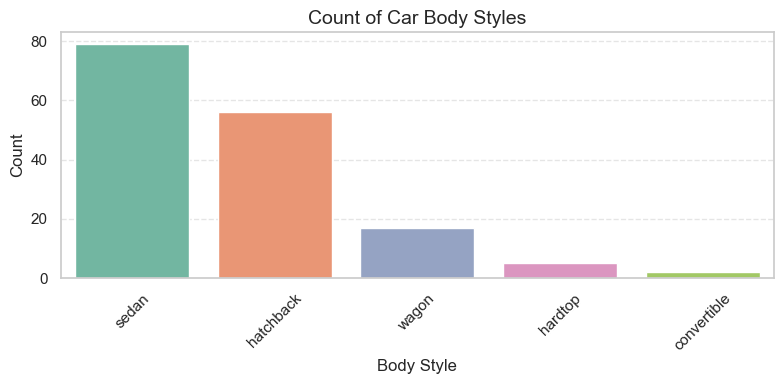

In [211]:
plt.figure(figsize=(8, 4))
sns.countplot(x='body-style', data=auto_df, palette='Set2')
plt.title('Count of Car Body Styles', fontsize=14)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [212]:
corr_matrix = auto_df.corr(numeric_only=True)


## Correlation Heatmap of Numeric Features

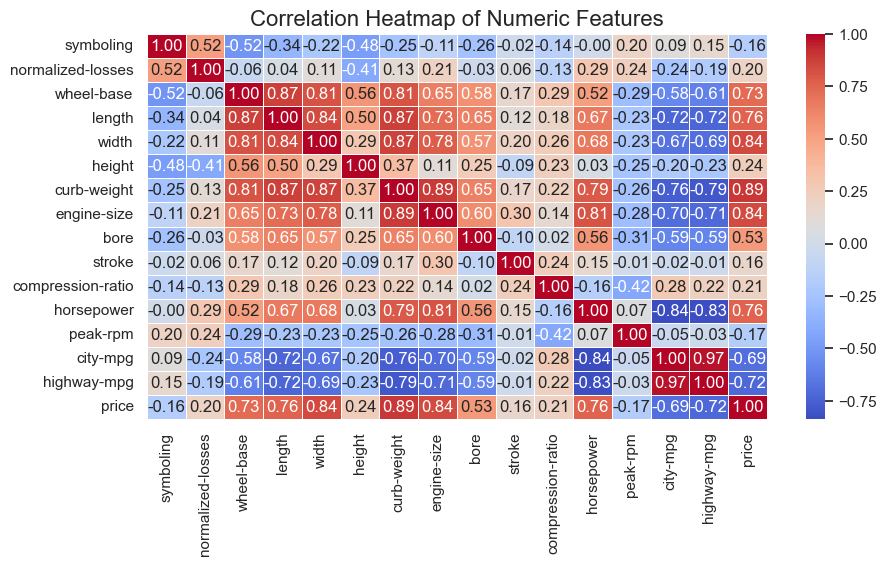

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
corr_matrix = auto_df.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(10, 5))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add title
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)

# Show the plot
plt.show()


In [214]:
print("Looping over columns:", numeric_cols.columns.tolist())


Looping over columns: ['3', '88.60', '168.80', '64.10', '48.80', '2548', '130', '9.00', '21', '27', '13495']


In [215]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(auto_df, drop_first=True)

# Separate features and target
X =df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (XGBoost doesn’t require it, but it’s good practice with other models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train_scaled, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [191]:
y_pred = xgb.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost R² Score: {r2:.2f}")


XGBoost RMSE: 1885.65
XGBoost R² Score: 0.80


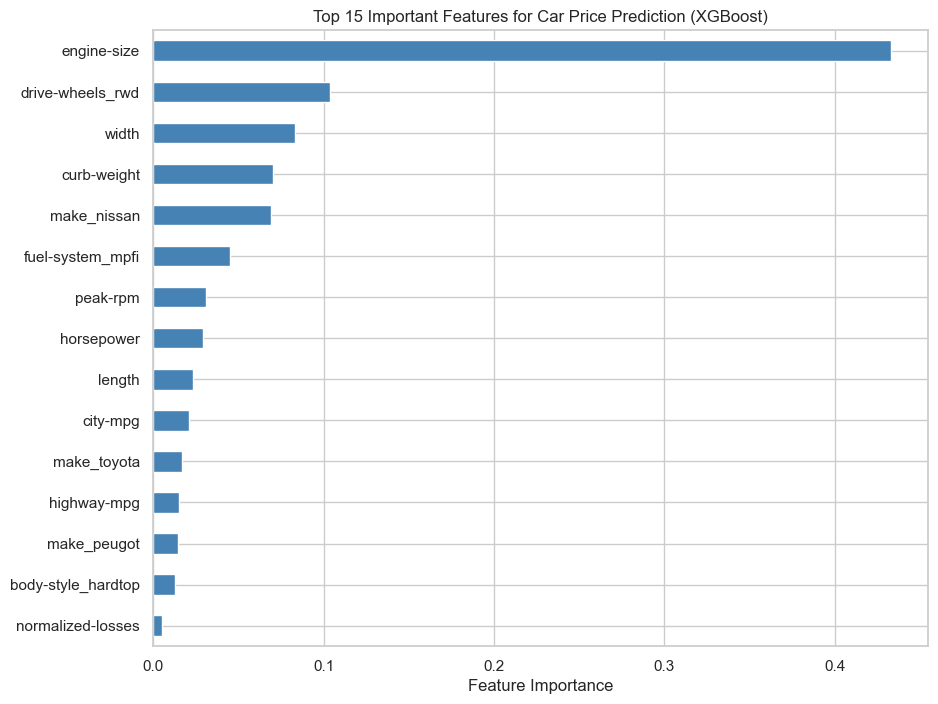

In [192]:
importances = xgb.feature_importances_
features = X.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importance_df[-15:].plot(kind='barh', color='steelblue')
plt.title('Top 15 Important Features for Car Price Prediction (XGBoost)')
plt.xlabel('Feature Importance')
plt.show()


In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

# Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)
    
    results[name] = {
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2': round(r2, 4)
    }

# Display results
result_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(result_df)


                          MSE      MAE     RMSE      R2
Linear Regression  2580209.25  1246.34  1606.30  0.8949
Random Forest      3058185.99  1327.73  1748.77  0.8754
Decision Tree      3113478.75  1340.62  1764.51  0.8732
KNN                3499190.29  1316.30  1870.61  0.8575
Gradient Boosting  3561188.48  1398.03  1887.11  0.8549
XGBoost            4728622.82  1474.78  2174.54  0.8074


In [117]:
from sklearn.ensemble import RandomForestRegressor

# Train your best model again
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)

# Now predict and store in final_preds
final_preds = best_model.predict(X_test)


## Actual vs Predicted Car Prices

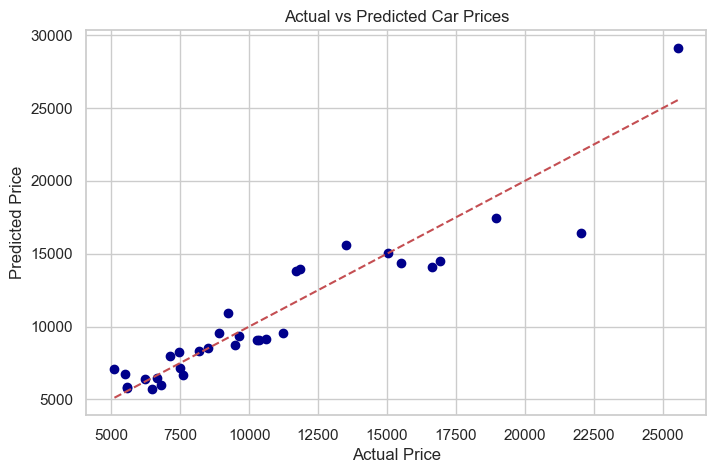

In [194]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, final_preds, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()


## Bar Plot RMSE Comparison vs MAE vs R2 SCORE

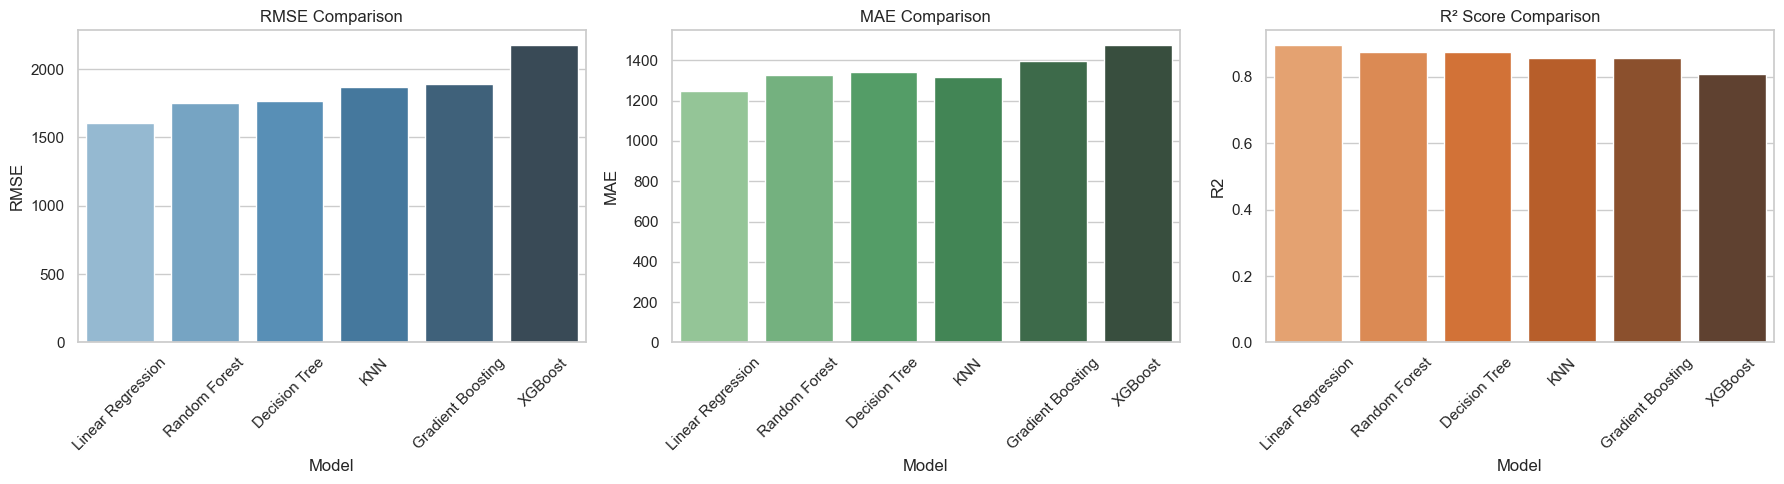

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
result_df_plot = result_df.reset_index().rename(columns={"index": "Model"})

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE plot
sns.barplot(data=result_df_plot, x="Model", y="RMSE", ax=axes[0], palette="Blues_d")
axes[0].set_title("RMSE Comparison")
axes[0].tick_params(axis='x', rotation=45)

# MAE plot
sns.barplot(data=result_df_plot, x="Model", y="MAE", ax=axes[1], palette="Greens_d")
axes[1].set_title("MAE Comparison")
axes[1].tick_params(axis='x', rotation=45)

# R² plot
sns.barplot(data=result_df_plot, x="Model", y="R2", ax=axes[2], palette="Oranges_d")
axes[2].set_title("R² Score Comparison")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
## Model Comparison

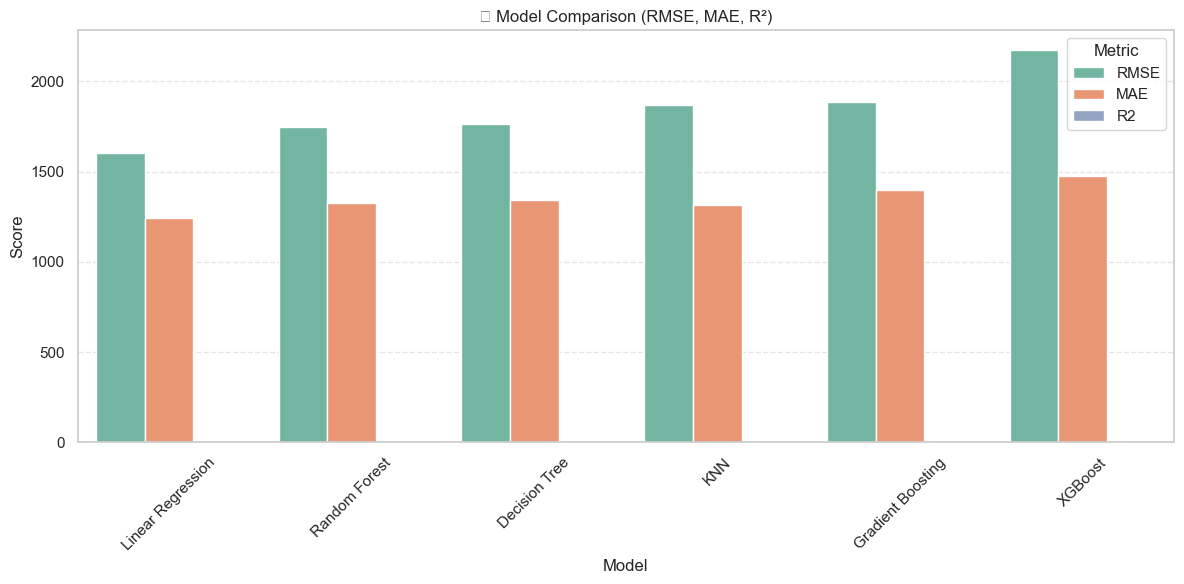

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
metrics_to_plot = result_df[['RMSE', 'MAE', 'R2']].copy()
metrics_to_plot['Model'] = metrics_to_plot.index
df_melted = metrics_to_plot.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')
plt.title('📊 Model Comparison (RMSE, MAE, R²)')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Metric')
plt.show()
